Import libraries

In [1]:
import numpy as np 
import random
import matplotlib.pyplot as plt 
from tensorflow.keras import layers
from tensorflow import keras 
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, MaxPooling2D
from keras.layers.convolutional import Conv2D 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

Load datasets

In [2]:
X_train = np.loadtxt('/content/drive/MyDrive/CNN/input.csv', delimiter = ',')
Y_train = np.loadtxt('/content/drive/MyDrive/CNN/labels.csv', delimiter = ',')

X_test = np.loadtxt('/content/drive/MyDrive/CNN/input_test.csv', delimiter = ',')
Y_test = np.loadtxt('/content/drive/MyDrive/CNN/labels_test.csv', delimiter = ',')

In [3]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

X_train = X_train/255.0
X_test = X_test/255.0

In [4]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 1)


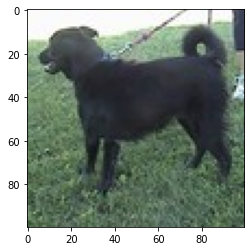

In [5]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

Model Training

In [6]:
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)),
    MaxPooling2D((2,2)),
    
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

In [7]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [8]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [9]:
model.fit(X_train, Y_train, epochs = 5, batch_size = 64)

Epoch 1/5
32/32 [==============================] - 21s 617ms/step - loss: 0.7064 - accuracy: 0.5215
Epoch 2/5
32/32 [==============================] - 21s 657ms/step - loss: 0.6447 - accuracy: 0.6180
Epoch 3/5
32/32 [==============================] - 20s 617ms/step - loss: 0.5743 - accuracy: 0.6915
Epoch 4/5
32/32 [==============================] - 20s 617ms/step - loss: 0.5087 - accuracy: 0.7670
Epoch 5/5
32/32 [==============================] - 20s 622ms/step - loss: 0.4334 - accuracy: 0.8050


In [11]:
model.evaluate(X_test, Y_test)

13/13 [==============================] - 1s 83ms/step - loss: 0.5660 - accuracy: 0.6950


[0.5660273432731628, 0.6949999928474426]

Model prediction

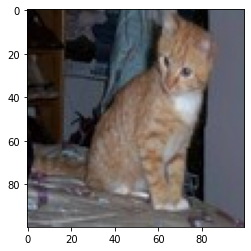

Our model says it is a : cat


In [13]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'
    
print("Our model says it is a :", pred)